In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mlpremier.cnn.preprocess import generate_cnn_data, split_preprocess_cnn_data
from mlpremier.cnn.model import build_train_cnn
import tensorflow as tf


# Run Full Training

======= Generating CNN Data for Season: 2020-21, Position: GK =======
Total players of type GK = 80.
0 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (2527, 3).
Generated combined features dataframe for preprocessing of shape: (2767, 1).

========== Done Generating CNN Data ==========

========== Splitting CNN Data ==========

Shape of windowed_df: (2527, 3)
Shape of a given window (prior to preprocessing): (3, 1)
========== Preprocessing CNN Data ==========

Mean of Standard Scaler:
[1.03794724]

Standard Deviation of Standard Scaler:
[2.2840418]
Transforming features using StandardScaler + OHE Pipeline.
========== Done Preprocessing CNN Data ==========

========== Done Splitting CNN Data ==========

====== Building CNN Architecture ======
====== Done Building CNN Architecture ======
Epoch 1/200
47/47 [==============================] - 0s 2ms/step - loss: 4.9448 - mae: 1.0248 - val_loss: 2.5618 - val_mae: 0.7313
Epoch 2/200
47/47 [=========

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test Loss (MSE): 3.9412639141082764, Test Mean Absolute Error (MAE): 1.0608062744140625


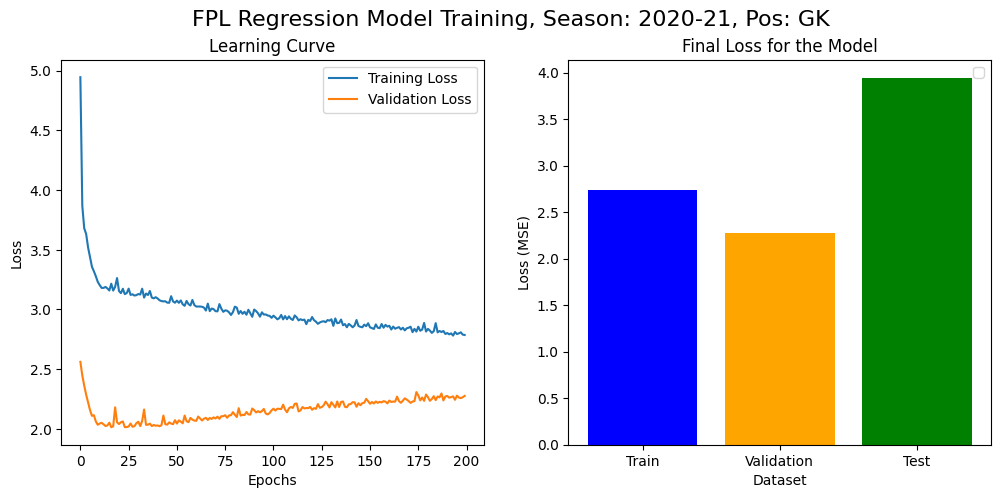

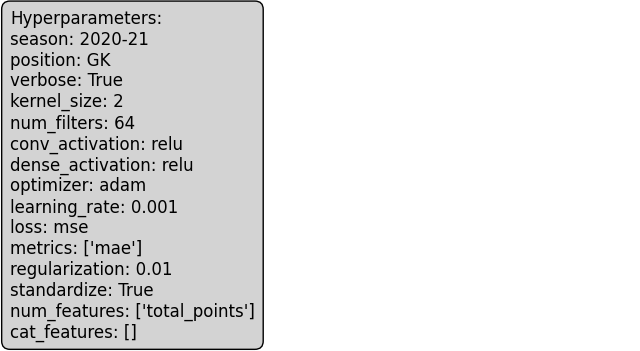

(<keras.src.engine.sequential.Sequential at 0x2c3bf8220>,
 {'season': '2020-21',
  'position': 'GK',
  'train_mse': 2.737210273742676,
  'train_mae': 0.8401675224304199,
  'val_mse': 2.2765204906463623,
  'val_mae': 0.6904047727584839,
  'test_mse': 3.9412639141082764,
  'test_mae': 1.0608062744140625,
  'verbose': True,
  'kernel_size': 2,
  'num_filters': 64,
  'conv_activation': 'relu',
  'dense_activation': 'relu',
  'optimizer': 'adam',
  'learning_rate': 0.001,
  'loss': 'mse',
  'metrics': ['mae'],
  'regularization': 0.01,
  'standardize': True,
  'num_features': ['total_points'],
  'cat_features': []})

In [5]:
STANDARD_NUM_FEATURES = ['minutes', 'goals_scored', 'assists', 'goals_conceded',
                          'clean_sheets', 'bps', 'yellow_cards', 'red_cards', 
                          'own_goals', 'saves', 'penalties_missed', 'penalties_saved',
                          'ict_index', 'total_points']
STANDARD_CAT_FEATURES = []

#tf.random.set_seed(229)
#np.random.seed(229)

DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'clean_data')

build_train_cnn(DATA_DIR,
                season = '2020-21', 
                position = 'GK', 
                window_size=3,
                kernel_size=2,
                num_filters=64,
                num_dense=64,
                batch_size = 32,
                epochs = 200,  
                drop_low_playtime = False,
                low_playtime_cutoff = 20,
                num_features = ['total_points'],
                cat_features = STANDARD_CAT_FEATURES, 
                conv_activation = 'relu',
                dense_activation = 'relu',
                learning_rate= 0.001,
                loss = 'mse',
                metrics = ['mae'],
                verbose = True,
                regularization = 0.01, 
                tolerance = 1e-5,   #not currently used, disabled early stopping
                plot = True, 
                standardize= True)

# GridSearch for Best Model

In [8]:
from mlpremier.cnn.experiment import gridsearch_cnn

gridsearch_cnn(epochs=75, verbose=False)

Epoch 1/75
48/48 [==============================] - 0s 2ms/step - loss: 3.9388 - mae: 0.8813 - val_loss: 4.8214 - val_mae: 1.1132
Epoch 2/75
48/48 [==============================] - 0s 900us/step - loss: 3.1999 - mae: 0.8046 - val_loss: 4.6617 - val_mae: 1.1174
Epoch 3/75
48/48 [==============================] - 0s 909us/step - loss: 3.0822 - mae: 0.8108 - val_loss: 4.5555 - val_mae: 1.0722
Epoch 4/75
48/48 [==============================] - 0s 869us/step - loss: 2.9858 - mae: 0.7995 - val_loss: 4.3427 - val_mae: 1.0498
Epoch 5/75
48/48 [==============================] - 0s 879us/step - loss: 2.9300 - mae: 0.7755 - val_loss: 4.2075 - val_mae: 1.1254
Epoch 6/75
48/48 [==============================] - 0s 874us/step - loss: 2.8381 - mae: 0.7965 - val_loss: 4.1518 - val_mae: 1.0451
Epoch 7/75
48/48 [==============================] - 0s 871us/step - loss: 2.8131 - mae: 0.7908 - val_loss: 4.1086 - val_mae: 1.0040
Epoch 8/75
48/48 [==============================] - 0s 884us/step - loss: 2.78

/Users/danielfrees/Desktop/mlpremier/mlpremier/cnn/../../mlpremier/cnn/evaluate.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log_df = pd.concat([log_df, eval_df], ignore_index=True)


## PieceWise Testing

## Generate the CNN Data

In [37]:
df, features_df = generate_cnn_data(data_dir=os.path.join(os.getcwd(), '..', 'data', 'clean_data'), 
                         season='2020-21', 
                         position='GK', 
                         window_size=6,
                         verbose = True)
df.loc[0,'features']


======= Generating CNN Data for Season: 2020-21, Position: GK =======
Dropping Players with Avg. Playtime < 25...

Total players of type GK = 80.
57 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (728, 3).
Generated combined features dataframe for preprocessing of shape: (866, 14).

========== Done Generating CNN Data ==========



minutes  goals_scored  assists  goals_conceded  clean_sheets  bps  \
0       90             0        0               2             0   12   
1       90             0        0               1             0   10   
2       90             0        0               1             0   26   
3       90             0        0               2             0   13   
4       90             0        0               1             0   18   
5       90             0        0               2             0   14   

   yellow_cards  red_cards  own_goals  saves  penalties_missed  \
0             0          0          0      2                 0   
1             0          0          0      1                 0   
2             0          0          0      7                 0   
3             0          0          0      3                 0   
4             0          0          0      5                 0   
5             0          0          0      3                 0   

   penalties_saved  ict_index  total_points  
0                0        1.8             1  
1                0        1.1             2  
2                0        5.2             4  
3                0        2.1             2  
4                0        2.8             3  
5                0        2.2             2

In [38]:
df.head(5)

name                                           features  target
0  Aaron Ramsdale     minutes  goals_scored  assists  goals_conce...       4
1  Aaron Ramsdale     minutes  goals_scored  assists  goals_conce...       2
2  Aaron Ramsdale     minutes  goals_scored  assists  goals_conce...       2
3  Aaron Ramsdale     minutes  goals_scored  assists  goals_conce...       3
4  Aaron Ramsdale     minutes  goals_scored  assists  goals_conce...       1

In [39]:
df.tail(5)

name                                           features  \
723  Kasper Schmeichel      minutes  goals_scored  assists  goals_conc...   
724  Kasper Schmeichel      minutes  goals_scored  assists  goals_conc...   
725  Kasper Schmeichel      minutes  goals_scored  assists  goals_conc...   
726  Kasper Schmeichel      minutes  goals_scored  assists  goals_conc...   
727  Kasper Schmeichel      minutes  goals_scored  assists  goals_conc...   

     target  
723       2  
724       0  
725       2  
726       2  
727      -2

In [40]:
df.loc[0,'features'].shape

(6, 14)

In [41]:
df.loc[0,'features']

minutes  goals_scored  assists  goals_conceded  clean_sheets  bps  \
0       90             0        0               2             0   12   
1       90             0        0               1             0   10   
2       90             0        0               1             0   26   
3       90             0        0               2             0   13   
4       90             0        0               1             0   18   
5       90             0        0               2             0   14   

   yellow_cards  red_cards  own_goals  saves  penalties_missed  \
0             0          0          0      2                 0   
1             0          0          0      1                 0   
2             0          0          0      7                 0   
3             0          0          0      3                 0   
4             0          0          0      5                 0   
5             0          0          0      3                 0   

   penalties_saved  ict_index  total_points  
0                0        1.8             1  
1                0        1.1             2  
2                0        5.2             4  
3                0        2.1             2  
4                0        2.8             3  
5                0        2.2             2

In [42]:
features_df

minutes  goals_scored  assists  goals_conceded  clean_sheets  bps  \
0        90             0        0               2             0   12   
1        90             0        0               1             0   10   
2        90             0        0               1             0   26   
3        90             0        0               2             0   13   
4        90             0        0               1             0   18   
..      ...           ...      ...             ...           ...  ...   
33       90             0        0               1             0   11   
34       90             0        0               4             0   12   
35       90             0        0               1             0    7   
36       90             0        0               2             0   17   
37       90             0        0               4             0    3   

    yellow_cards  red_cards  own_goals  saves  penalties_missed  \
0              0          0          0      2                 0   
1              0          0          0      1                 0   
2              0          0          0      7                 0   
3              0          0          0      3                 0   
4              0          0          0      5                 0   
..           ...        ...        ...    ...               ...   
33             0          0          0      2                 0   
34             0          0          0      2                 0   
35             0          0          0      0                 0   
36             0          0          0      4                 0   
37             0          0          1      1                 0   

    penalties_saved  ict_index  total_points  
0                 0        1.8             1  
1                 0        1.1             2  
2                 0        5.2             4  
3                 0        2.1             2  
4                 0        2.8             3  
..              ...        ...           ...  
33                0        1.4             2  
34                0        1.4             0  
35                0        0.3             2  
36                0        3.7             2  
37                0        0.5            -2  

[866 rows x 14 columns]

In [43]:
features_df.describe()

minutes  goals_scored     assists  goals_conceded  clean_sheets  \
count  866.000000    866.000000  866.000000      866.000000    866.000000   
mean    74.073903      0.001155    0.002309        1.092379      0.247113   
std     34.207582      0.033981    0.048029        1.263361      0.431582   
min      0.000000      0.000000    0.000000        0.000000      0.000000   
25%     90.000000      0.000000    0.000000        0.000000      0.000000   
50%     90.000000      0.000000    0.000000        1.000000      0.000000   
75%     90.000000      0.000000    0.000000        2.000000      0.000000   
max     90.000000      1.000000    1.000000        9.000000      1.000000   

              bps  yellow_cards   red_cards   own_goals       saves  \
count  866.000000    866.000000  866.000000  866.000000  866.000000   
mean    15.396074      0.033487    0.001155    0.003464    2.461894   
std      9.859308      0.180009    0.033981    0.058789    2.092995   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%     10.000000      0.000000    0.000000    0.000000    1.000000   
50%     15.000000      0.000000    0.000000    0.000000    2.000000   
75%     23.000000      0.000000    0.000000    0.000000    4.000000   
max     45.000000      1.000000    1.000000    1.000000   11.000000   

       penalties_missed  penalties_saved   ict_index  total_points  
count             866.0       866.000000  866.000000    866.000000  
mean                0.0         0.012702    1.921940      3.137413  
std                 0.0         0.112050    1.530191      3.046584  
min                 0.0         0.000000    0.000000     -2.000000  
25%                 0.0         0.000000    0.700000      1.000000  
50%                 0.0         0.000000    1.800000      2.000000  
75%                 0.0         0.000000    2.900000      6.000000  
max                 0.0         1.000000    7.600000     15.000000

## Split & Preprocess CNN Data

In [44]:
X_train, y_train, X_val, y_val, X_test, y_test = split_preprocess_cnn_data(df, 
                                                            features_df,
                                                            standardize=False, 
                                                            verbose=True)

# Print shapes
#print("Expecting Shapes to be of (ex, window, ftr) where \n \tftr: ORGNL_FEATURE_SIZE + 19 (team dummies) + 19 (opponent_team dummies) = 58")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

========== Splitting CNN Data ==========

Shape of windowed_df: (728, 3)
Shape of a given window (prior to preprocessing): (6, 14)
========== Preprocessing CNN Data ==========

No StandardScaler applied. standardize=False.
Transforming features using StandardScaler + OHE Pipeline.
========== Done Preprocessing CNN Data ==========

========== Done Splitting CNN Data ==========

X_train shape: (414, 6, 14)
y_train shape: (414,)
X_val shape: (186, 6, 14)
y_val shape: (186,)
X_test shape: (128, 6, 14)
y_test shape: (128,)


In [45]:
X_train[0:2]

array([[[90. ,  0. ,  0. ,  2. ,  0. , 12. ,  0. ,  0. ,  0. ,  2. ,
          0. ,  0. ,  1.8,  1. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 10. ,  0. ,  0. ,  0. ,  1. ,
          0. ,  0. ,  1.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 26. ,  0. ,  0. ,  0. ,  7. ,
          0. ,  0. ,  5.2,  4. ],
        [90. ,  0. ,  0. ,  2. ,  0. , 13. ,  0. ,  0. ,  0. ,  3. ,
          0. ,  0. ,  2.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 18. ,  0. ,  0. ,  0. ,  5. ,
          0. ,  0. ,  2.8,  3. ],
        [90. ,  0. ,  0. ,  2. ,  0. , 14. ,  0. ,  0. ,  0. ,  3. ,
          0. ,  0. ,  2.2,  2. ]],

       [[90. ,  0. ,  0. ,  1. ,  0. , 10. ,  0. ,  0. ,  0. ,  1. ,
          0. ,  0. ,  1.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 26. ,  0. ,  0. ,  0. ,  7. ,
          0. ,  0. ,  5.2,  4. ],
        [90. ,  0. ,  0. ,  2. ,  0. , 13. ,  0. ,  0. ,  0. ,  3. ,
          0. ,  0. ,  2.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 18. ,  0. ,  0. ,  0. ,  5. ,
  

In [46]:
y_train[0:2]

array([4, 2])